# Population Data from CSV

This notebooks reads sample population data from `data/atlantis.csv` and plots it using Matplotlib. Edit `data/atlantis.csv` and re-run this cell to see how the plots change!

In [26]:
import matplotlib.pyplot as plt
import pandas
import numpy as np 

S0 = 300 # velocità di pompaggio in lt/s
Q0 = 60  # flusso in sccm

def trova_lunghezza_sequenza(x_temp):
    n = len(x_temp)
    for i in range(1, n // 2 + 1):
        if np.array_equal(x_temp[:i], x_temp[i:2*i]):
            return i
    return n

df = pandas.read_csv('../data/griglia.csv', sep=';')
q_raw = np.array(df["f"] * Q0)
s_raw = np.array(df["g"] * S0)
p_raw = np.array(df["p"])
p1_raw = np.array(df["p1"])


In [27]:

# Definisci i limiti dell'intervallo desiderato
q_min, q_max = 30, 60
s_min, s_max = 100, 300

# Crea una maschera per selezionare i dati all'interno dell'intervallo desiderato
mask = (q_raw >= q_min) & (q_raw <= q_max) & (s_raw >= s_min) & (s_raw <= s_max)

In [28]:
q_temp = q_raw[mask]
s_temp = s_raw[mask]
p_temp = p_raw[mask]
p1_temp = p1_raw[mask]

In [50]:
s_shape = trova_lunghezza_sequenza(s_temp)
q_shape = len(p_temp) // s_shape

Q = q_temp.reshape(q_shape, s_shape)
S = s_temp.reshape(q_shape, s_shape)
P = p_temp.reshape(q_shape, s_shape) * 1000
P1 = p1_temp.reshape(q_shape, s_shape) * 1000


In [54]:
Q

array([[30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
        30.],
       [33., 33., 33., 33., 33., 33., 33., 33., 33., 33., 33., 33., 33.,
        33.],
       [36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36.,
        36.],
       [39., 39., 39., 39., 39., 39., 39., 39., 39., 39., 39., 39., 39.,
        39.],
       [42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42.,
        42.],
       [45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
        45.],
       [48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48.,
        48.],
       [51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51.,
        51.],
       [54., 54., 54., 54., 54., 54., 54., 54., 54., 54., 54., 54., 54.,
        54.],
       [57., 57., 57., 57., 57., 57., 57., 57., 57., 57., 57., 57., 57.,
        57.],
       [60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
        60.]])

In [55]:
# Filtra i punti con P = 4.5 (approssimativamente)
threshold = 0.1
target = 4.5
mask = np.abs(P - target) < threshold
S_filtered_0 = S[mask]
Q_filtered_0 = Q[mask]


# Esegui una regressione polinomiale di secondo grado
coefficients_0 = np.polyfit(S_filtered_0, Q_filtered_0, 2)
polynomial_0 = np.poly1d(coefficients_0)    

# Stampa i coefficienti dell'equazione polinomiale
print("Coefficiente di secondo grado:", coefficients_0[0])
print("Coefficiente di primo grado:", coefficients_0[1])
print("Termine costante:", coefficients_0[2])

Coefficiente di secondo grado: -0.00010408733181010685
Coefficiente di primo grado: 0.19859101294744966
Termine costante: 3.4523990860623517


In [56]:
# Filtra i punti con P = 4.5 (approssimativamente)
threshold = 0.1
target = 4.5
mask = np.abs(P1 - target) < threshold
S_filtered_1 = S[mask]
Q_filtered_1 = Q[mask]


# Esegui una regressione polinomiale di secondo grado
coefficients_1 = np.polyfit(S_filtered_1, Q_filtered_1, 2)
polynomial_1 = np.poly1d(coefficients_1)    

# Stampa i coefficienti dell'equazione polinomiale
print("Coefficiente di secondo grado:", coefficients_1[0])
print("Coefficiente di primo grado:", coefficients_1[1])
print("Termine costante:", coefficients_1[2])

Coefficiente di secondo grado: -4.206098843322526e-05
Coefficiente di primo grado: 0.16940063091482513
Termine costante: 6.476735015773045


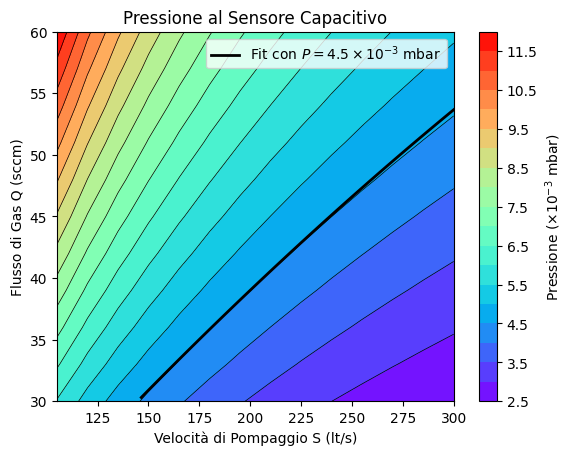

In [63]:
# Creazione del grafico di tipo contour plot con mappa di colori
contour_filled = plt.contourf(S, Q, P, levels=20, cmap="rainbow")
contour_lines = plt.contour(S, Q, P, levels=20, colors='black', linewidths=0.5)

# Aggiunta di etichette agli assi
plt.xlabel('Velocità di Pompaggio S (lt/s)')
plt.ylabel('Flusso di Gas Q (sccm)')

# Aggiunta di un titolo
plt.title('Pressione al Sensore Capacitivo')

# Aggiunta di una barra dei colori
cbar = plt.colorbar(contour_filled)
cbar.set_label('Pressione ($\\times 10^{-3}$ mbar)')

# Traccia la curva polinomiale
x_fit = np.linspace(s_min, s_max, 100)
y_fit = polynomial_0(x_fit)
mask = (y_fit >= q_min) & (y_fit <= q_max)

plt.plot(x_fit[mask], y_fit[mask], 'k-', linewidth=2, label='Fit con $P = 4.5 \\times 10^{-3}$ mbar')


# Aggiunta della legenda
plt.legend()

# Mostra il grafico
plt.show()

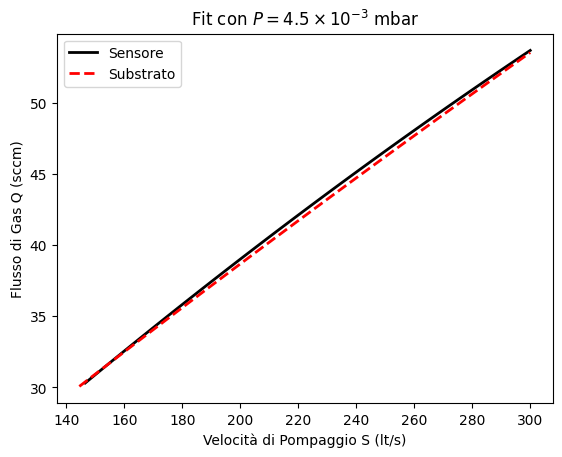

In [68]:
# Aggiunta di etichette agli assi
plt.xlabel('Velocità di Pompaggio S (lt/s)')
plt.ylabel('Flusso di Gas Q (sccm)')

# Aggiunta di un titolo
plt.title('Fit con $P = 4.5 \\times 10^{-3}$ mbar')


# Traccia la curva polinomiale
x_fit = np.linspace(s_min, s_max, 100)
y_fit = polynomial_0(x_fit)
mask = (y_fit >= q_min) & (y_fit <= q_max)

plt.plot(x_fit[mask], y_fit[mask], 'k-', linewidth=2, label='Sensore')

# Traccia la curva polinomiale
x_fit = np.linspace(s_min, s_max, 100)
y_fit = polynomial_1(x_fit)
mask = (y_fit >= q_min) & (y_fit <= q_max)

plt.plot(x_fit[mask], y_fit[mask], 'r--', linewidth=2, label='Substrato')

# Aggiunta della legenda
plt.legend()

# Mostra il grafico
plt.show()